# Day 15

## Part 1

- sensors and beacons sit at integer grid coordinates
- sensors know their own position and the position of the nearest beacon
- closest distances determined as Manhattan distances
- there is never a tie between beacon distances

`In the row where y=2000000, how many positions cannot contain a beacon?`

In [61]:
from matplotlib import pyplot as plt
from utils import parse_from_file, ParseConfig

parser = ParseConfig('\n', ParseConfig(': closest beacon is at x=', [
    ParseConfig('Sensor at x=', [None, ParseConfig(', y=', int)]),
    ParseConfig(', y=', int)
]))

sensor_data = parse_from_file('day_15.txt', parser)

print(sensor_data[:2])

[[[[220580, 684270]], [436611, 263737]], [[[3329538, 3016377]], [3355914, 2862466]]]


In [62]:
# remove the redundant list in list from parsing
temp = []
for (sensor, *_), (beacon) in sensor_data:
    temp.append((sensor, beacon))
sensor_data = temp

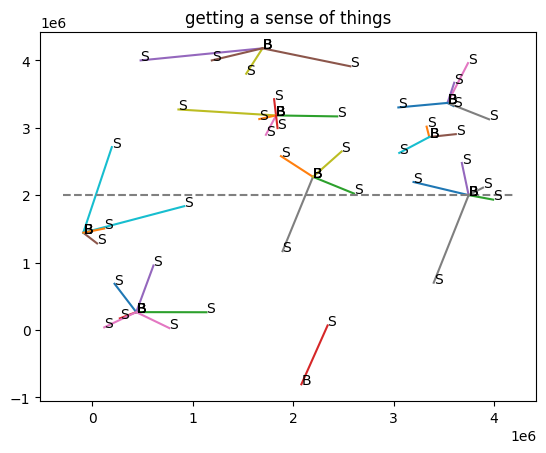

In [63]:
# lets take a look at this on a plot
fig, ax = plt.subplots()

row_to_investigate = 2000000

for (s_x, s_y), (b_x, b_y) in sensor_data:
    ax.plot((s_x, b_x), (s_y, b_y))
    ax.text(s_x, s_y, 'S')
    ax.text(b_x, b_y, 'B')
ax.set_title('getting a sense of things')
ax.plot(ax.get_xlim(), [row_to_investigate]*2, '--', color='gray')

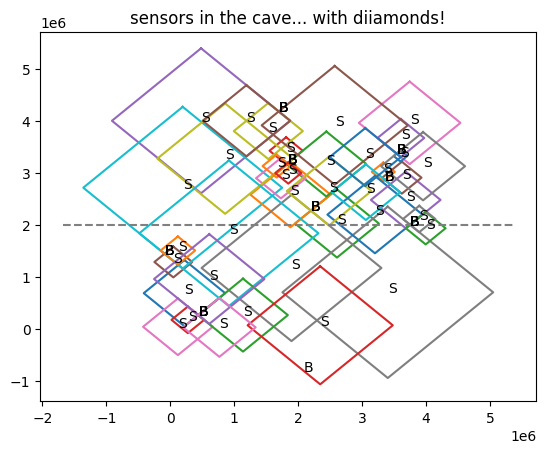

In [64]:
# let's do even better and get the Manhatten diamonds each sensor confirms
def get_bounds(sensor: tuple[int], beacon: tuple[int]) -> tuple[tuple[int]]:
    """
    returns the coordinates of the 4 vertecies of the Manhattan distance bound
    of each sensor beacon pair

    returns up twice for easy plotting
    """
    s_x, s_y = sensor
    b_x, b_y = beacon
    mh_dist = abs(s_x - b_x) + abs(s_y - b_y)
    up = (s_x, s_y + mh_dist)
    down = (s_x, s_y - mh_dist)
    left = (s_x - mh_dist, s_y)
    right = (s_x + mh_dist, s_y)
    return up, right, down, left, up

fig, ax = plt.subplots()
for sensor, beacon in sensor_data:
    ax.plot(*map(list, zip(*get_bounds(sensor, beacon))))
    ax.text(*sensor, 'S')
    ax.text(*beacon, 'B')
ax.set_title('sensors in the cave... with diiamonds!')
ax.plot(ax.get_xlim(), [row_to_investigate]*2, '--', color='gray')

In [65]:
# any sensors with diamonds that don't intersect y=2,000,000 can be disregarded
applicable_sensors = []
for sensor, beacon in sensor_data:
    bounds = get_bounds(sensor, beacon)
    (_, y2), _, (_, y1), *_ = bounds
    if y1 <= row_to_investigate <= y2:
        applicable_sensors.append((sensor, bounds))

In [66]:
# additionally, find any beacons which are on y=2,000,000 since those will 
# need to be subtracted from our total
temp = []
for _, (x, y) in sensor_data:
    if y == row_to_investigate:
        temp.append((x, y))

# there can only be one (of each beacon)!
applicable_beacons = set(temp)

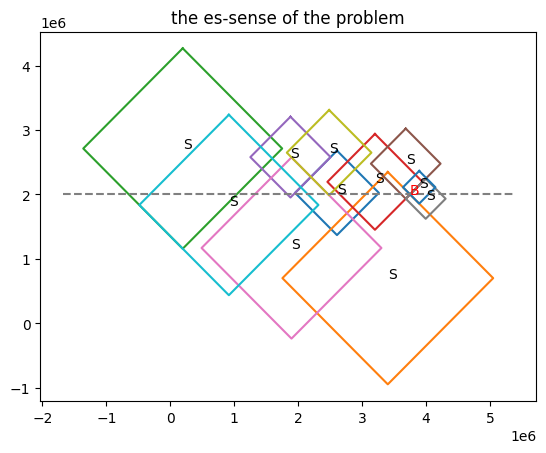

In [67]:
# so, what's the damage?
fig, ax = plt.subplots()
for sensor, bounds in applicable_sensors:
    ax.plot(*map(list, zip(*bounds)))
    ax.text(*sensor, 'S')
for beacon in applicable_beacons:
    ax.text(*beacon, 'B', color='red')
ax.set_title('the es-sense of the problem')
ax.plot(ax.get_xlim(), [row_to_investigate]*2, '--', color='gray')

In [74]:
# now all that's left is to find the total amount of y=2,000,000 that those
# diamonds cover
def get_accounted_for_bounds(
    sensor: tuple[int], bounds: tuple[tuple[int]], row: int
) -> tuple[int]:
    """
    returns min and max x values covered by this sensor at the row specified
    """
    s_x, s_y = sensor
    (_, u_y), *_ = bounds
    sensor_to_row = abs(s_y - row)
    mh_dist = abs(u_y - s_y)
    x_reach = mh_dist - sensor_to_row
    return s_x - x_reach, s_x + x_reach

x_bounds = []
x_min, x_max = None, None
for sensor, bounds in applicable_sensors:
    x1, x2 = get_accounted_for_bounds(sensor, bounds, row_to_investigate)
    x_bounds.append((x1, x2))
    if x_min is None or x1 < x_min:
        x_min = x1
    if x_max is None or x2 > x_max:
        x_max = x2

print(x_min, x_max)

-649258 4237112


In [75]:

row_state = [False for _ in range(x_min, x_max + 1)]

for x1, x2 in x_bounds:
    for index in range(x1 - x_min, x2 - x_min + 1):
        row_state[index] = True

total_without_beacons = sum(row_state) - len(applicable_beacons)

In [76]:
print(
    'the total number of integer positions without a beacon at row: ' \
    f'{row_to_investigate} is {total_without_beacons}'
)

the total number of integer positions without a beacon at row: 2000000 is 4886370
